# Census Income

## Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.
Controls for Hispanic Origin by age and sex.
Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")
print("import complete")

import complete


### Loading the dataset 

In [2]:
df = pd.read_csv("census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Exploratory Data Analysis

In [3]:
# checking shape of dataset
df.shape

(32560, 15)

In [4]:
# checking info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Dataset has 6 numerical variables and 9 categorical variables

In [5]:
# checking column names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
# checking datatypes of the variables
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
#checking missing values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

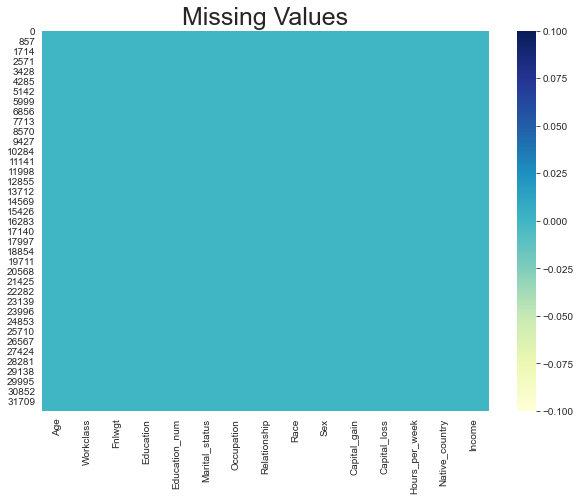

In [8]:
# visualising the missing values 
plt.figure(figsize=(10,7))
plt.title("Missing Values",fontsize=25)
sns.heatmap(df.isnull(),cmap='YlGnBu')
plt.show()

From the above visualisations we can infer that there are no missing columns in the dataset

In [9]:
print("Number of unique values in features: ")
df.nunique()

Number of unique values in features: 


Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

- Analysing Target Variable Income

In [10]:
print(f"Target: 'Income'\nUnique Values in Income: {df.Income.unique()}\nNumber of unique values: {df.Income.nunique()}")

Target: 'Income'
Unique Values in Income: [' <=50K' ' >50K']
Number of unique values: 2


- Here there are two catgories:
    - '<=50K' : People who have income less than 50K a year
    - '>50k'  : People who have income more than 50K a year
- Will be encoding this into a numerical value for better interpretation on the basis of either the income is greater than 50K or not, If greater than 50K will be encoding with '1' and if less than 50K will be encoding with '0'

In [11]:
df.Income = df.Income.map({" <=50K":0," >50K":1})
print(f"Target: 'Income'\nUnique Values in Income: {df.Income.unique()}\nNumber of unique values: {df.Income.nunique()}")

Target: 'Income'
Unique Values in Income: [0 1]
Number of unique values: 2


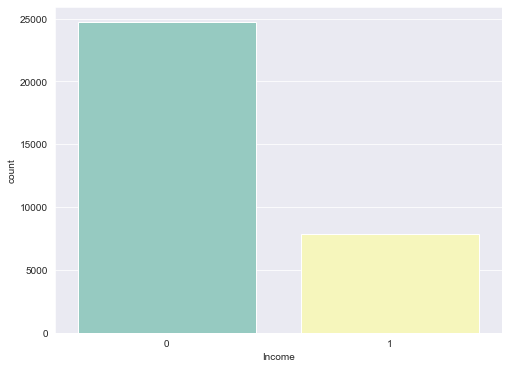

0    24719
1     7841
Name: Income, dtype: int64


In [12]:
# visualising the distribution of target column
plt.figure(figsize=(8,6))
sns.countplot(x=df.Income,palette='Set3')
plt.show()
print(df.Income.value_counts())

- There is an imbalance in the dataset since the categories have higher difference in there count
- People with higher income than 50k are very less in number as compared to people with less income than 50K

- Analysing features types as numerical or categorical

In [13]:
# analysing numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  7
['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income']


In [14]:
# visualising numerical features
df[numerical_features].head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,83311,13,0,0,13,0
1,38,215646,9,0,0,40,0
2,53,234721,7,0,0,40,0
3,28,338409,13,0,0,40,0
4,37,284582,14,0,0,40,0


In [15]:
# checking statistical summary od numerical variables
df[numerical_features].describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


- From the above table we can see the statistical summary of the variables
- For Capital_gain and Capital_loss the mean is too high than median which implies that there is abnormality in the distibution, since mean is greater than median they are highly right skewed
- Also there is some amount of skewness in 'Fnlwgt' variable since it has a very high standard deviation which shows that the data is highly spread and we cannot rely on mean for measure of central tendency of the data, so have to use median for a better approximation.

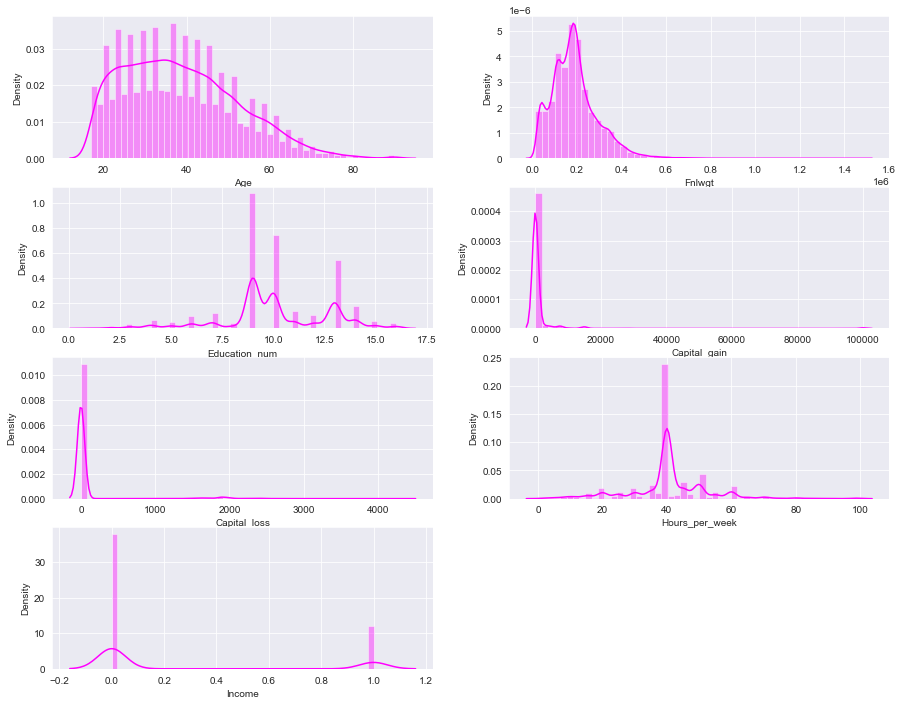

In [16]:
# analysing distribution of the numerical Features
plt.figure(figsize=(15,12))
plot = 1
for var in numerical_features:
    plt.subplot(4,2,plot)
    sns.distplot(df[var],color='magenta')
    plot+=1
plt.show()

- From the above distribution plots we can see that Capital_loss and Capital_gain are highly skewed to right which means most of the observations are in the intial bins of the variable.
- Income and Education numbers are discrete in nature 
- Fnlwgt is also not normally distributed

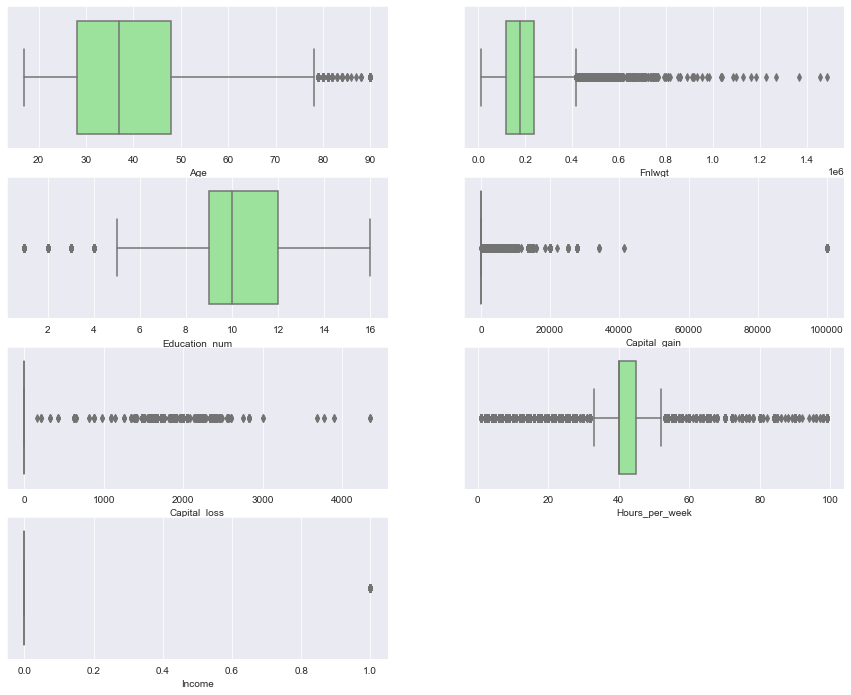

In [17]:
# analysing the spread of data using boxplots through which we can also visualise outliers
plt.figure(figsize=(15,12))
plot = 1
for var in numerical_features:
    plt.subplot(4,2,plot)
    sns.boxplot(x=df[var],color='lightgreen')
    plot+=1
plt.show()

- From above plots can see that there are outliers in the dataset 
- Outliers in the Income and Education_num columns are natural outliers which means it is not due to an artificial error.

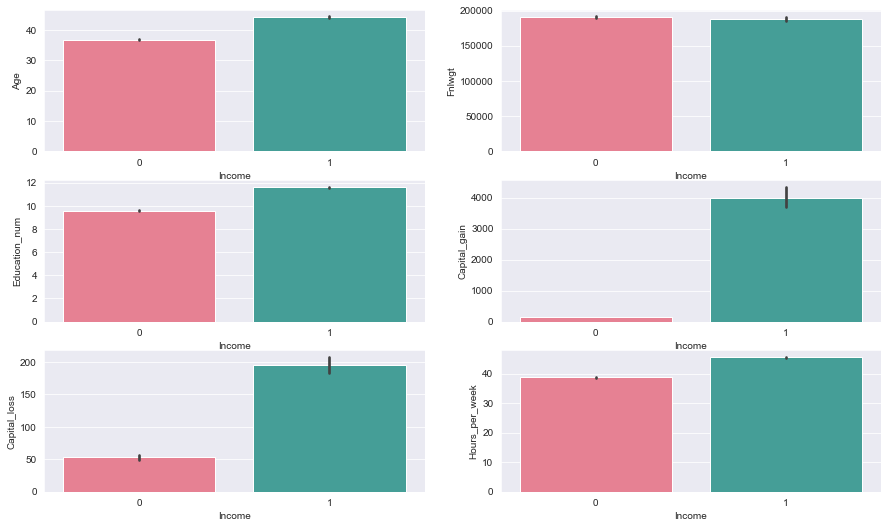

In [18]:
# analysing the variables with respect to income column
plt.figure(figsize=(15,12))
plot = 1
cols = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
for var in cols:
    plt.subplot(4,2,plot)
    sns.barplot(x=df.Income,y=df[var],palette='husl')
    plot+=1
plt.show()

- Generally People with higher age than 35 have higher income than 50K
- Higher the number of educations higher the income and high chance of being in the income greater than 50K category
- Capital gain highly impacts the income category if the gain is high the population have less chance of being in low income category 
- Capital loss has less difference between both the groups as seen from the above plot which implies capital loss is also major factor to divide the income groups
- Hours per week has very less difference from which we can say that both the groups are working for somewhat equal number of hours 

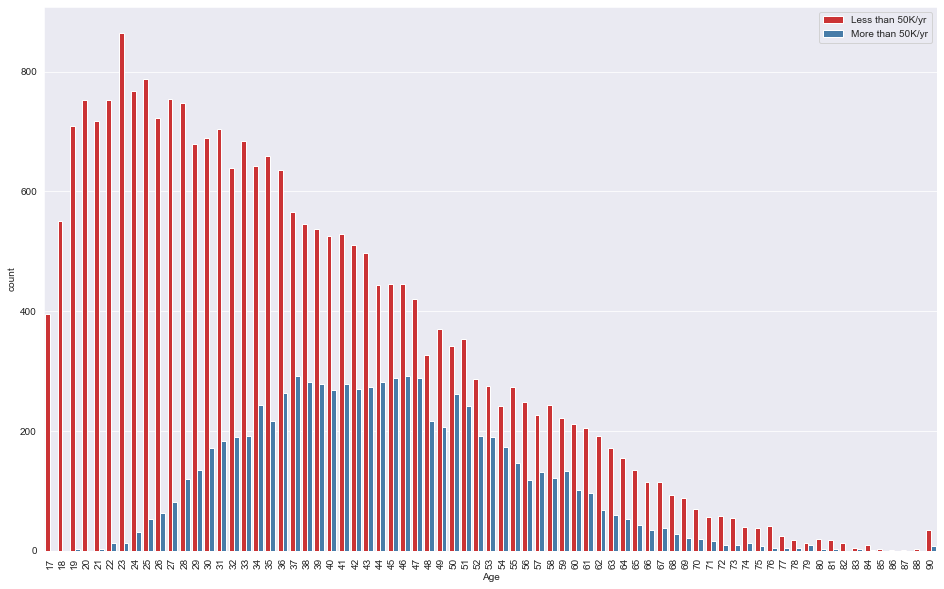

In [19]:
# Visualising the Age feature with income in more detail
plt.figure(figsize=(16,10))
sns.countplot(x='Age',hue='Income',data=df,palette='Set1')
plt.xticks(rotation=90)
plt.legend(labels=['Less than 50K/yr','More than 50K/yr'],loc='upper right')
plt.show()

- People with lower income are higher in number than people with high income
- People with higher income usually are less in number in the early age and increase in number as age increases and generally they drop in number after 50's whereas people with low income are very high in numbers at early ages as compared to other group and their number decreases somewhere around 30's from which we can infer that High income population starts earning little later than low income population.

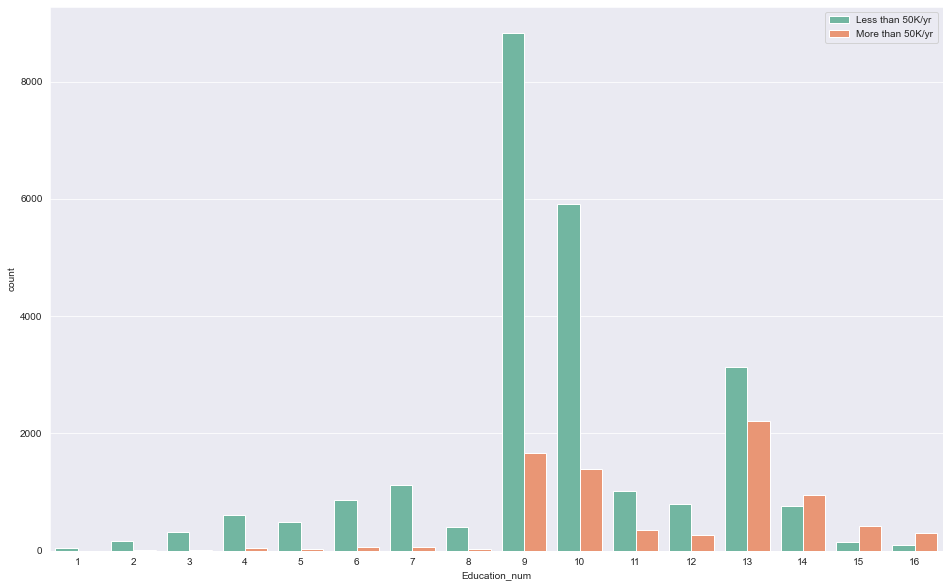

In [20]:
# Visualising the Education_num feature with income in more detail
plt.figure(figsize=(16,10))
sns.countplot(x='Education_num',hue='Income',data=df,palette='Set2')
plt.legend(labels=['Less than 50K/yr','More than 50K/yr'],loc='upper right')
plt.show()

- The above plot shows relation between the level of education and Income
- Less number of population is working with education num higher or lower than level 9 and the low income population is highest in number for level 9 education 
- Population with higher income increases at slower rate as education level increases

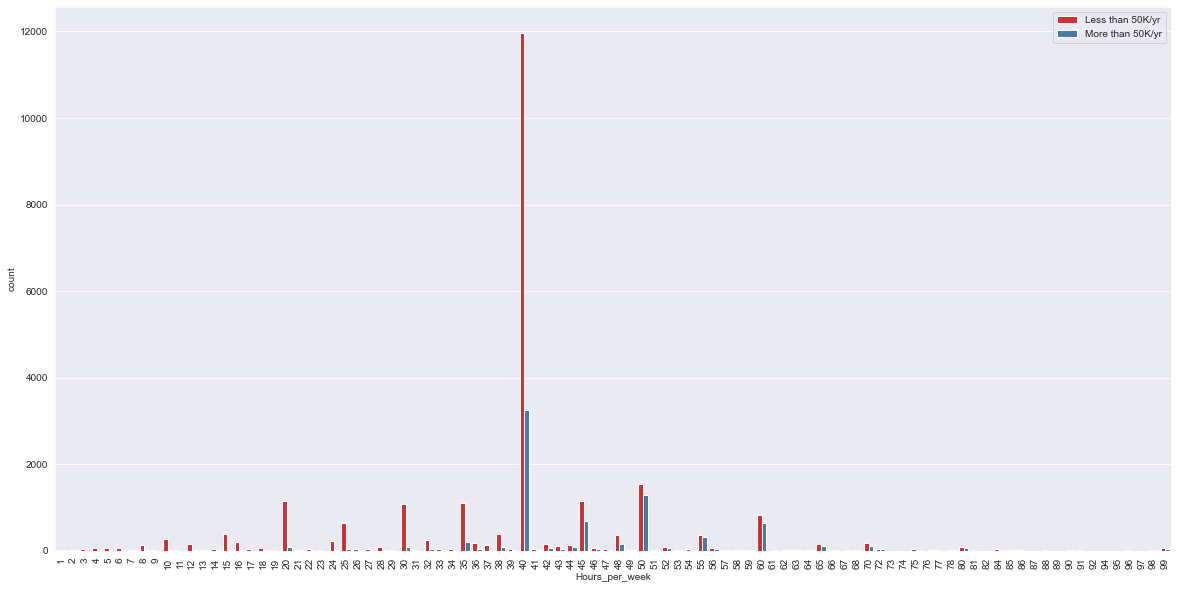

In [21]:
# Visualising the Hours_per_week feature with income in more detail
plt.figure(figsize=(20,10))
sns.countplot(x='Hours_per_week',hue='Income',data=df,palette='Set1')
plt.xticks(rotation=90)
plt.legend(labels=['Less than 50K/yr','More than 50K/yr'],loc='upper right')
plt.show()

- The above plot shows the relation between Hours worked per week and Income
- From this we can infer that population with low income work for more hours as compared to population with high income

In [22]:
# analysing categorical variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O' ] 
print('Number of numerical variables: ', len(categorical_features))
print(categorical_features)

Number of numerical variables:  8
['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']


In [23]:
for var in categorical_features:
    print("{} has {} categories".format(var,len(df[var].unique())))

Workclass has 9 categories
Education has 16 categories
Marital_status has 7 categories
Occupation has 15 categories
Relationship has 6 categories
Race has 5 categories
Sex has 2 categories
Native_country has 42 categories


In [24]:
# visualising categorical features
df[categorical_features].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States


In [25]:
# checking statistical summary od numerical variables
df[categorical_features].describe()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
count,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27815,21789,29169


- From the above table show the statistical summary of the features
- From this table we can infer that 
  - Major Workclass category is Private which means major population is working as private    employee
  - Majority of the population is High school grad
  - Majorly population is married to a civilian 
  - Most of the population is from Profesional Speciality occupation
  - Mostly males are earning 

In [26]:
#checking unique values in type feature
for i in categorical_features:
    print("Unique values in {} are \n{}".format(i,df[i].value_counts()))
    print("-"*40)

Unique values in Workclass are 
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
----------------------------------------
Unique values in Education are 
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
----------------------------------------
Unique values in Marital_status are 
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed          

In [27]:
# Analysing Workclass
# will be replacing '?' with nan value 
#will be combining Without-pay and Never-worked  categories as they somewhat similar both are not earning
df.Workclass = df.Workclass.str.replace('Never-worked', 'Without-pay')
df.Workclass = df.Workclass.replace(' ?', np.NaN)

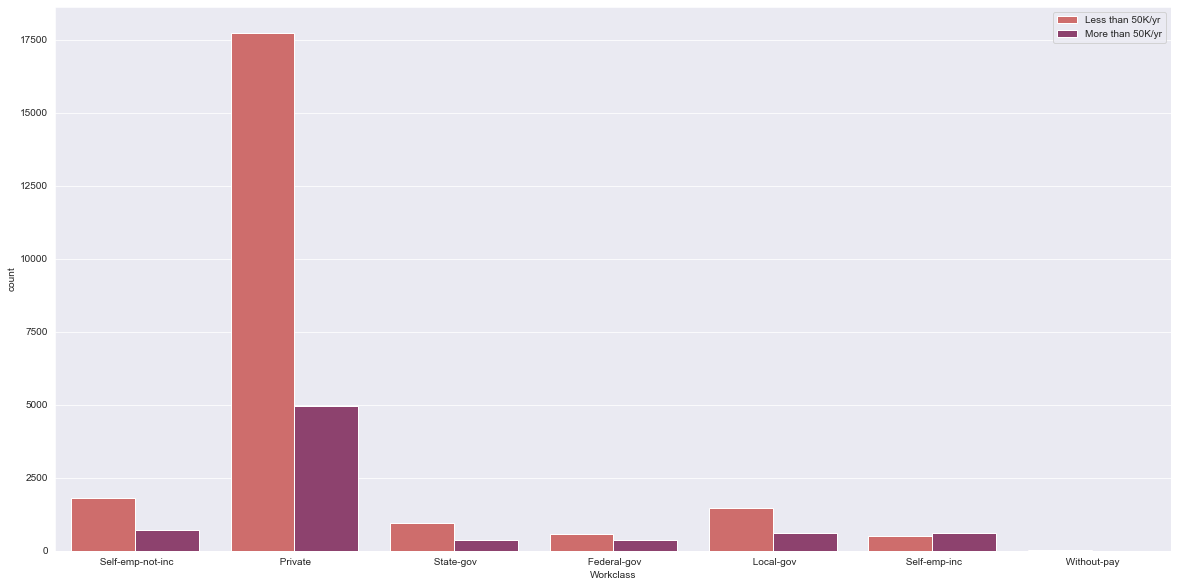

In [28]:
# Visualising the Workclass feature with income in more detail
plt.figure(figsize=(20,10))
sns.countplot(x='Workclass',hue='Income',data=df,palette='flare')
plt.legend(labels=['Less than 50K/yr','More than 50K/yr'],loc='upper right')
plt.show()

- Majorly there are people who have private workclass with Federal-gov Workclass being the least
- Private workclass has highest low income people and highest high income people as well.

In [29]:
#Analysing Occupation
df.Occupation = df.Occupation.replace(' ?', np.NaN)

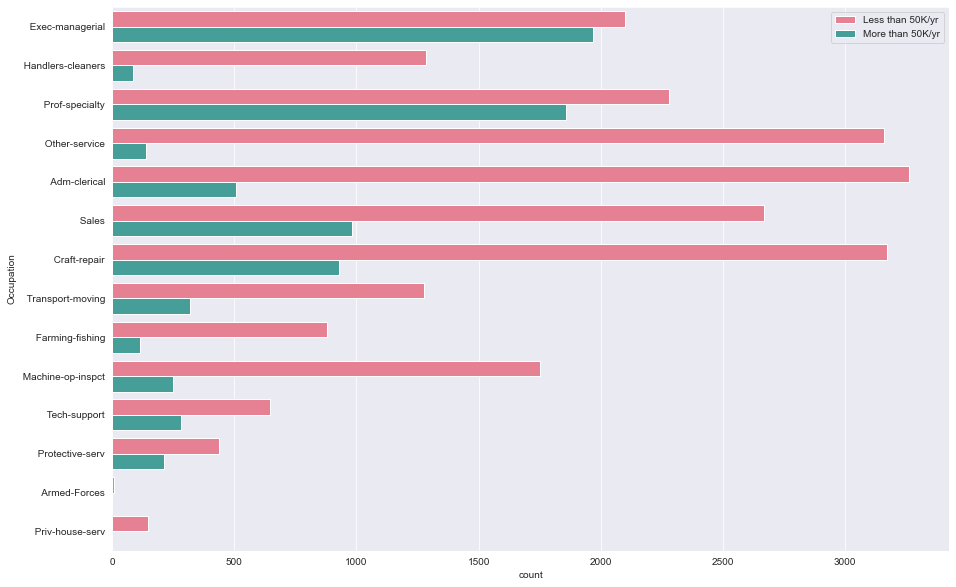

In [30]:
# Visualising the Occupation feature with income in more detail
plt.figure(figsize=(15,10))
sns.countplot(y='Occupation',hue='Income',data=df,palette='husl')
plt.legend(labels=['Less than 50K/yr','More than 50K/yr'],loc='upper right')
plt.show()

- Adm-clerical has the major part of the population with Armed- Forces being the least
- Executive mangerial occupation has the highest number of people with high income with Armed-Forces being the least.
- Adm-crerical occupation has most of the population from with income above 50K and Handle-Cleaners being the least followed by Armed- Forces  

In [31]:
# analysing Native_country
# since we are checking the income for citizens of US so will be combining countries other than USA to Not_USA 
df.Native_country = df.Native_country.replace(' ?', np.NaN)
df.Native_country.loc[df.Native_country == ' United-States'] = 'usa'
df.Native_country.loc[df.Native_country != 'usa'] = 'non_usa'

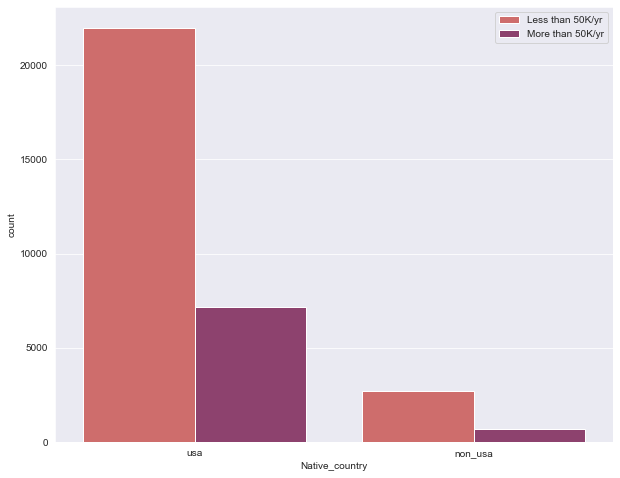

In [32]:
# Visualising the Native_country feature with income in more detail
plt.figure(figsize=(10,8))
sns.countplot(x='Native_country',hue='Income',data=df,palette='flare')
plt.legend(labels=['Less than 50K/yr','More than 50K/yr'],loc='upper right')
plt.show()

Majorly People from high and low incomes are from USA, also non USA citizens have very low number of people with income above 50K/yr   

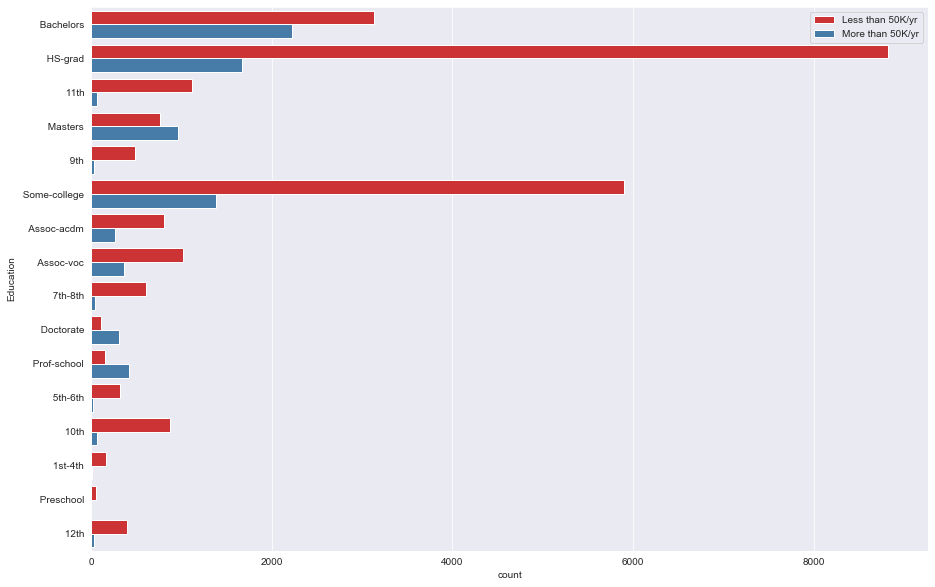

In [33]:
# Visualising the Education feature with income 
plt.figure(figsize=(15,10))
sns.countplot(y='Education',hue='Income',data=df,palette='Set1')
plt.legend(labels=['Less than 50K/yr','More than 50K/yr'],loc='upper right')
plt.show()

- High school grad contributes more to the income and also has the highest number of people with income under 50K/yr
- Pre-schoolers and 5th-6th grades doesn't contribute the income however 5th-6th grades has a small number of contributions
- Bachelors have the highest number of people with income more than 50K/yr

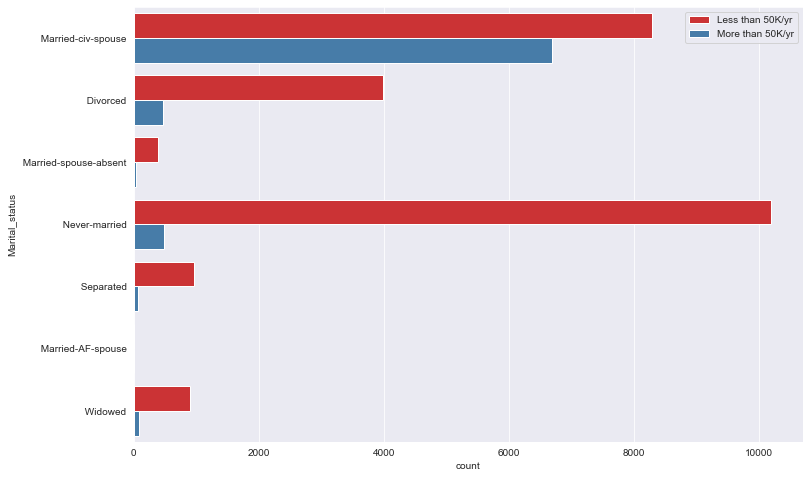

In [34]:
# Visualising the Marital_status feature with income 
plt.figure(figsize=(12,8))
sns.countplot(y='Marital_status',hue='Income',data=df,palette='Set1')
plt.legend(labels=['Less than 50K/yr','More than 50K/yr'],loc='upper right')
plt.show()

- Married-civ-spouse contributes the most to the income 
- Married-civ-spouse have the highest number of people with income above 50K/yr
- Never-married category has th highest number of people with income below 50K/yr
- Married-AF-spouse category contribute least to the income
- Married-spouse-absent, separated, Widowed categories have very less  number of people with income above 50K/yr

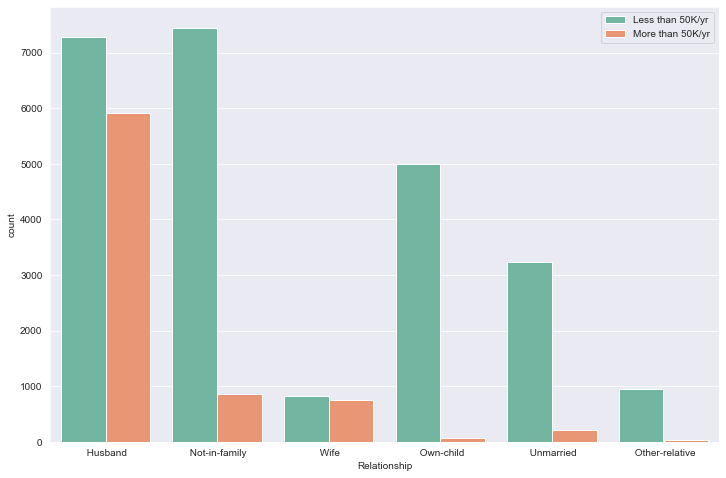

In [35]:
# Visualising the Relationship feature with income 
plt.figure(figsize=(12,8))
sns.countplot(x='Relationship',hue='Income',data=df,palette='Set2')
plt.legend(labels=['Less than 50K/yr','More than 50K/yr'],loc='upper right')
plt.show()

- Majorly Males who are married here categorized as Husband contribute the most to the income as a member from family and majorly has the count of both people above and below income of 50K/yr
- Members who are not in a family or people who dont have a family have the highest number people with income below 50K/yr
- Wives as a family member have approx equal number for income above or below 50K/yr

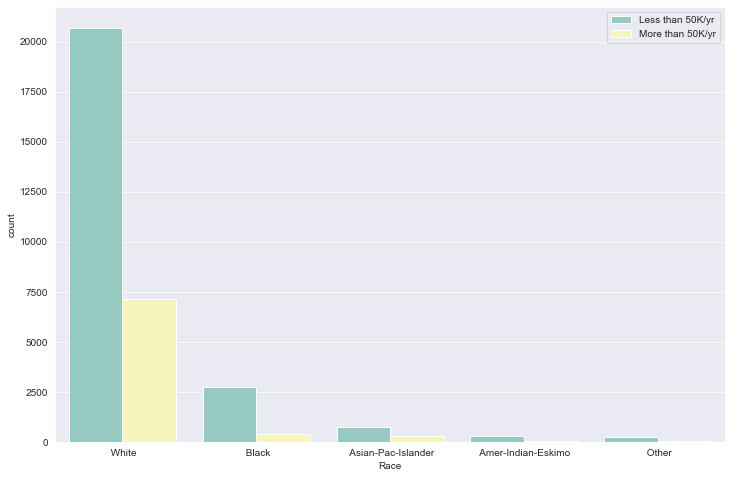

In [36]:
# Visualising the Race feature with income 
plt.figure(figsize=(12,8))
sns.countplot(x='Race',hue='Income',data=df,palette='Set3')
plt.legend(labels=['Less than 50K/yr','More than 50K/yr'],loc='upper right')
plt.show()

- Majorly white race contributes to the income and Also it has the highest number of people with income above and below 50K/yr
- Other races have the least number of people with income below 50K/yr
- Asian-Pac-Islanders have the least number of people with income above 50K/yr

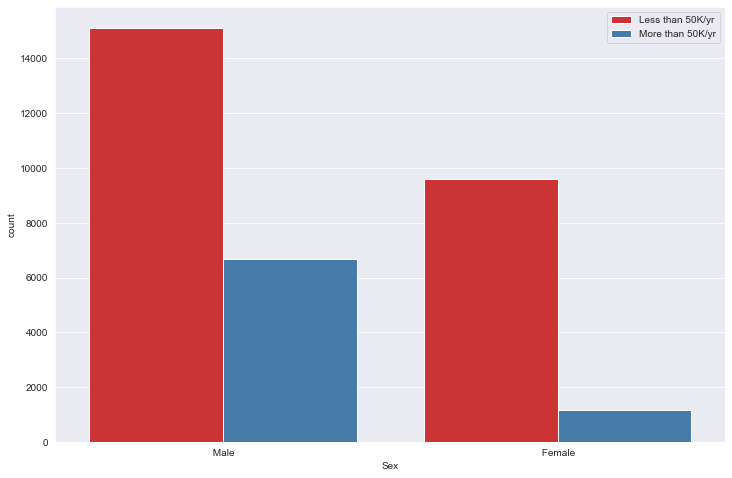

In [37]:
# Visualising Gender with income 
plt.figure(figsize=(12,8))
sns.countplot(x='Sex',hue='Income',data=df,palette='Set1')
plt.legend(labels=['Less than 50K/yr','More than 50K/yr'],loc='upper right')
plt.show()

- Males contribute the most to income than females
- Males are the ones to have highest numbers of income below and above 50K/yr

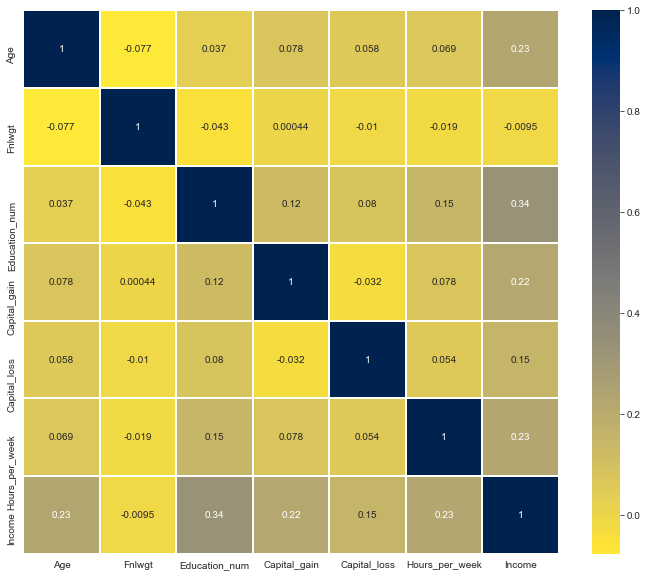

In [38]:
# checking corelation 
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='cividis_r',linewidths=1)
plt.show()

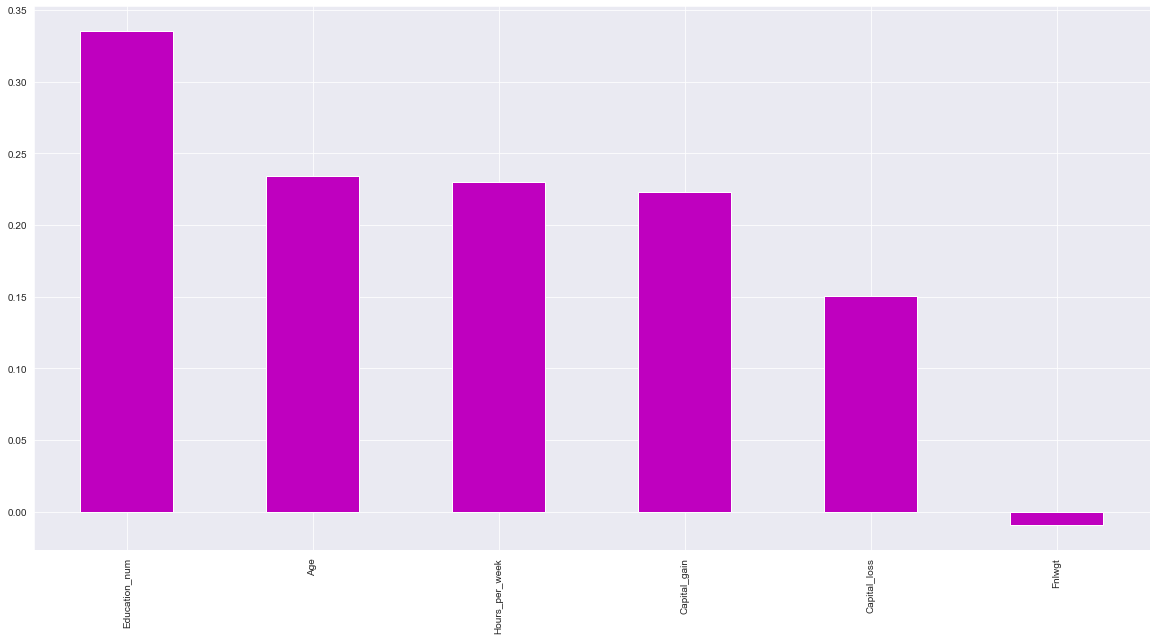

In [39]:
# checking correlation with respect to target variable
plt.figure(figsize=(20,10))
df.corr().Income.sort_values(ascending=False).drop('Income').plot.bar(color='m')
plt.show()

In [40]:
#checking missing values
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country       0
Income               0
dtype: int64

In [41]:
print("Workclass", np.round(df['Workclass'].isnull().mean(),4), ' % missing values')
print("Occupation", np.round(df['Occupation'].isnull().mean(),4), ' % missing values')

Workclass 0.0564  % missing values
Occupation 0.0566  % missing values


In [42]:
# creating a copy of dataset
df2 = df.copy()

In [43]:
# since the missing values are less than 1% of the dataset will be dropping the rows with missing values
df2.dropna(axis=0,inplace=True)

#### Outlier Detection and Treatment

In [44]:
#columns to detect outliers for 
cols=['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']
from scipy.stats import zscore
z = np.abs(zscore(df2.loc[:,cols]))
print(f" Indices of outliers : {np.where(z>3)}")
print(f" Number of outliers : {(np.shape(np.where(z > 3))[1]/(df2.shape[0]*df2.shape[1]))*100} %")


 Indices of outliers : (array([    9,    22,    26, ..., 30641, 30673, 30680]), array([4, 3, 4, ..., 4, 1, 2]))
 Number of outliers : 0.5395492181311109 %


In [45]:
# since there about 0.5% of outliers in the dataset so will be trimming the outliers using z score method
df3 = df2[(z < 3).all(axis = 1)]
df3

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,usa,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,usa,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,usa,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,non_usa,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,usa,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,usa,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,usa,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,usa,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,usa,0


### Feature Engineering

#### Encoding categorical features

Since Education and Education_num give same information as Education_num has the level of education which represents Education feature as Education also has levels of education,so will be dropping the Education column.

In [46]:
df3.drop(['Education'],axis=1,inplace=True)

In [47]:
# mapping Gender and native_countrywith 0 and 1

# Gender : male-1, female-0
df3.Sex = df3.Sex.map({" Male":1," Female":0})

# Native country usa-1, non_usa-0
df3.Native_country = df3.Native_country.map({"usa":1,"non_usa":0})

In [48]:
# target encoding the rest of categorical columns
import category_encoders as ce
encoder=ce.TargetEncoder(cols=['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race']) 
encoded=encoder.fit_transform(df3[['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race']],df3['Income']) 

In [49]:
df4=df3.drop(['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race'],axis=1)
df4 = pd.concat([df4, encoded], axis=1)
df4.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Workclass,Marital_status,Occupation,Relationship,Race
0,50,83311,13,1,0,0,13,1,0,0.260417,0.431601,0.455577,0.432012,0.244162
1,38,215646,9,1,0,0,40,1,0,0.201506,0.096096,0.056025,0.095160,0.244162
2,53,234721,7,1,0,0,40,1,0,0.201506,0.431601,0.056025,0.432012,0.115242
3,28,338409,13,0,0,0,40,0,0,0.201506,0.431601,0.419126,0.472797,0.115242
4,37,284582,14,0,0,0,40,1,0,0.201506,0.431601,0.455577,0.472797,0.244162


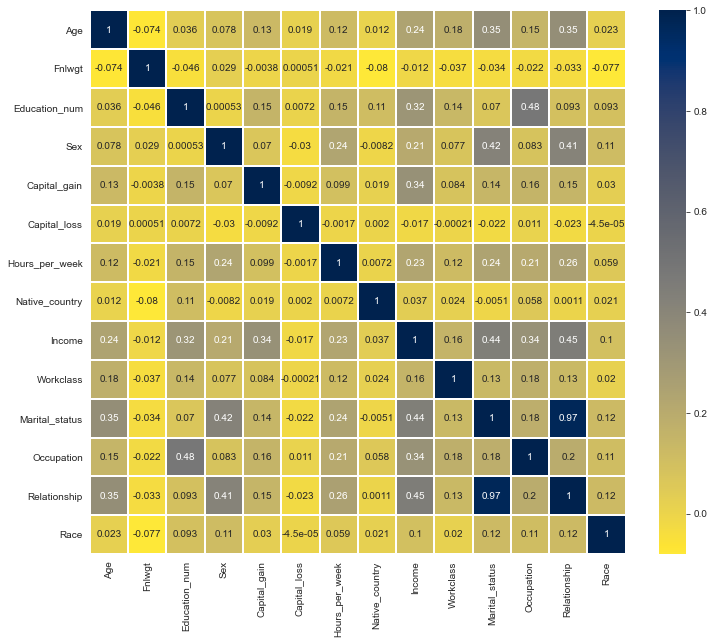

In [50]:
# checking corelation 
plt.figure(figsize=(12,10))
sns.heatmap(df4.corr(),annot=True,cmap='cividis_r',linewidths=1)
plt.show()

From above we can see that there is very high correlation between independent variables so will be dropping one of them

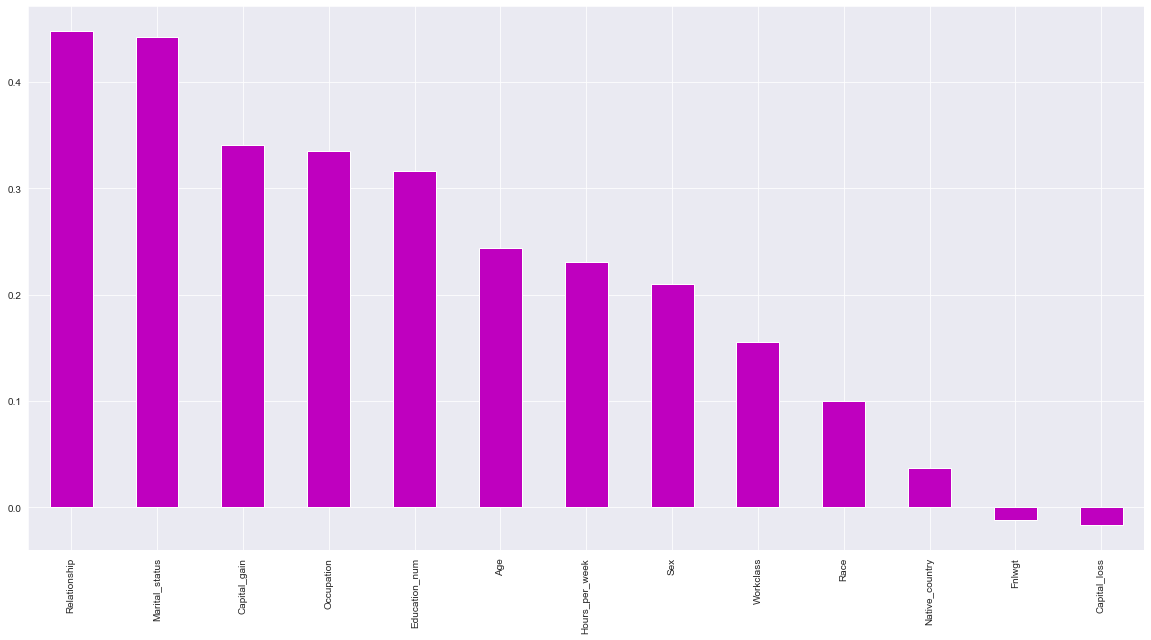

In [51]:
# checking correlation with respect to target variable
plt.figure(figsize=(20,10))
df4.corr().Income.sort_values(ascending=False).drop('Income').plot.bar(color='m')
plt.show()

Correlation of relationship and marital_status is high as compared to other variables capital_loss is least

In [52]:
# removing multicolinearity
df4.drop(['Marital_status'],axis=1,inplace=True)

#### Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df4.loc[:,'Age':'Hours_per_week'] = scaler.fit_transform(df4.loc[:,'Age':'Hours_per_week'])
df4

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Workclass,Occupation,Relationship,Race
0,0.550000,0.141285,0.800000,1.0,0.00000,0.0,0.112676,1,0,0.260417,0.455577,0.432012,0.244162
1,0.350000,0.410143,0.533333,1.0,0.00000,0.0,0.492958,1,0,0.201506,0.056025,0.095160,0.244162
2,0.600000,0.448897,0.400000,1.0,0.00000,0.0,0.492958,1,0,0.201506,0.056025,0.432012,0.115242
3,0.183333,0.659555,0.800000,0.0,0.00000,0.0,0.492958,0,0,0.201506,0.419126,0.472797,0.115242
4,0.333333,0.550197,0.866667,0.0,0.00000,0.0,0.492958,1,0,0.201506,0.455577,0.472797,0.244162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.166667,0.494774,0.733333,0.0,0.00000,0.0,0.464789,1,0,0.201506,0.282710,0.472797,0.244162
32556,0.383333,0.285660,0.533333,1.0,0.00000,0.0,0.492958,1,1,0.201506,0.118172,0.432012,0.244162
32557,0.683333,0.280654,0.533333,0.0,0.00000,0.0,0.492958,1,0,0.201506,0.128284,0.057637,0.244162
32558,0.083333,0.381383,0.533333,1.0,0.00000,0.0,0.211268,1,0,0.201506,0.128284,0.013188,0.244162


#### Handling Data Imbalance

There is imbalance in the datset as the target column is not distributed in equal proportions.

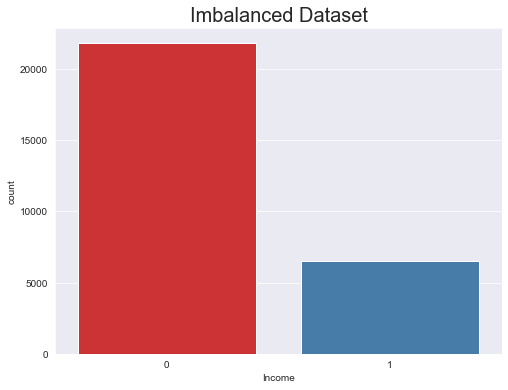

0    21797
1     6492
Name: Income, dtype: int64


In [54]:
plt.figure(figsize=(8,6))
sns.countplot(x=df4.Income,palette='Set1')
plt.title("Imbalanced Dataset",fontsize=20)
plt.show()
print(df4.Income.value_counts())

In [55]:
# will be handling the imbalnce using SMOTE over sampling technique 
from imblearn.over_sampling import SMOTE
X = df4.drop(['Income'],axis=1)
Y = df4.Income
sm = SMOTE(sampling_strategy='minority')
x,y = sm.fit_resample(X,Y)
print(x.shape," \t ",y.shape)

(43594, 12)  	  (43594,)


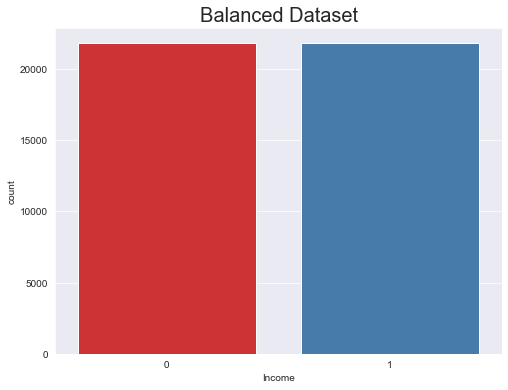

1    21797
0    21797
Name: Income, dtype: int64


In [56]:
plt.figure(figsize=(8,6))
sns.countplot(x=y,palette='Set1')
plt.title("Balanced Dataset",fontsize=20)
plt.show()
print(y.value_counts())

### Model Building

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_roc_curve,roc_curve,auc,roc_auc_score,precision_score,recall_score,f1_score

In [61]:
# performing train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [62]:
# creating instances for models
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SVC = SVC()
DTC = DecisionTreeClassifier()
NB = MultinomialNB()
RTF = RandomForestClassifier()
ADB = AdaBoostClassifier()
GB = GradientBoostingClassifier()

In [63]:
# creating list of model names and instances
models = [("Logistic Regression ",LR),
          ("K Nearest Neighbor classifier ",KNN),
          ("Support Vector classifier ",SVC),
          ("Decision Tree classifier ",DTC),
          ("Random forest classifier ",RTF),
          ("AdaBoost classifier",ADB),
          ("Gradient Boosting classifier ",GB),
          ("Naive Bayes classifier",NB)]

##### Training the models 

In [64]:
for name,model in models:
    model.fit(xtrain,ytrain)
    print(name," trained")

Logistic Regression   trained
K Nearest Neighbor classifier   trained
Support Vector classifier   trained
Decision Tree classifier   trained
Random forest classifier   trained
AdaBoost classifier  trained
Gradient Boosting classifier   trained
Naive Bayes classifier  trained


##### Evaluating the models

In [65]:
train_scores=[]
test_scores=[]
Model = []
for name,model in models:
    print("******",name,"******")
    train_acc = accuracy_score(ytrain,model.predict(xtrain))
    test_acc = accuracy_score(ytest,model.predict(xtest))
    print('Train score : ',train_acc)
    print('Test score : ',test_acc)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    Model.append(name)

****** Logistic Regression  ******
Train score :  0.8130755366213338
Test score :  0.8121416010398349
****** K Nearest Neighbor classifier  ******
Train score :  0.8993937407832213
Test score :  0.8529704105818487
****** Support Vector classifier  ******
Train score :  0.8254301163362281
Test score :  0.8235339093202845
****** Decision Tree classifier  ******
Train score :  1.0
Test score :  0.8516706170196499
****** Random forest classifier  ******
Train score :  1.0
Test score :  0.9026683997247495
****** AdaBoost classifier ******
Train score :  0.8548254956578731
Test score :  0.8523587430231669
****** Gradient Boosting classifier  ******
Train score :  0.8783876781910536
Test score :  0.8716262711216454
****** Naive Bayes classifier ******
Train score :  0.7207275110601343
Test score :  0.7114458291918342


****** Logistic Regression  ******

 ROC_AUC_SCORE :  0.812020986326379
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      6502
           1       0.80      0.83      0.82      6577

    accuracy                           0.81     13079
   macro avg       0.81      0.81      0.81     13079
weighted avg       0.81      0.81      0.81     13079

Precision:  0.8012576776835332
Recall:  0.8330545841569105
F1 score:  0.8168468132687291
AxesSubplot(0.125,0.536818;0.62x0.343182)


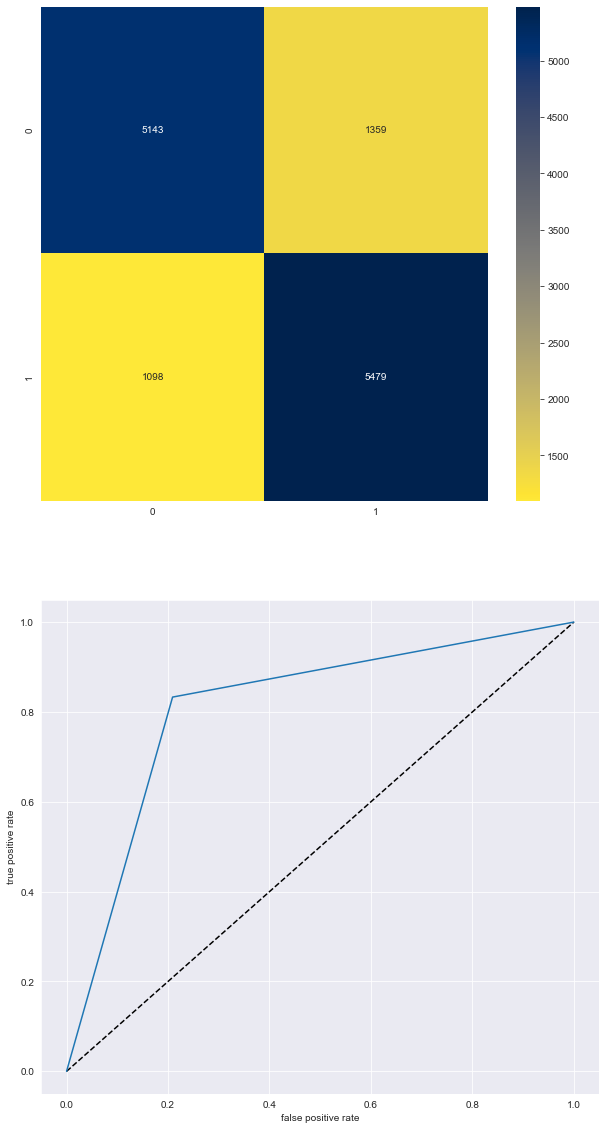

****** K Nearest Neighbor classifier  ******

 ROC_AUC_SCORE :  0.8525214192407411
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      6502
           1       0.81      0.93      0.86      6577

    accuracy                           0.85     13079
   macro avg       0.86      0.85      0.85     13079
weighted avg       0.86      0.85      0.85     13079

Precision:  0.8065876152832675
Recall:  0.9308195225786833
F1 score:  0.8642620173642973
AxesSubplot(0.125,0.536818;0.62x0.343182)


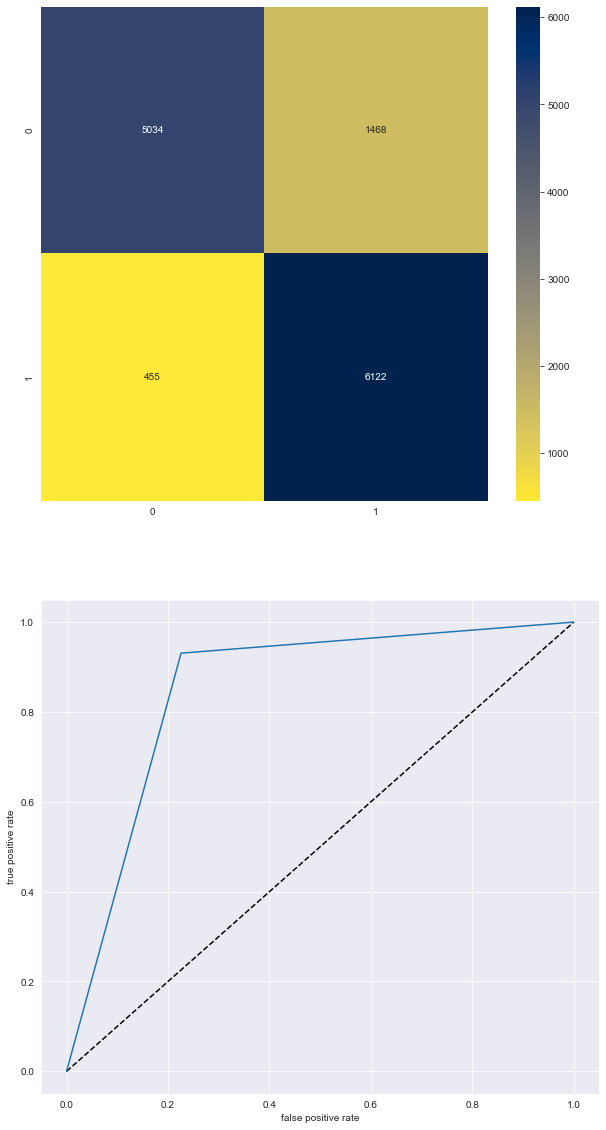

****** Support Vector classifier  ******

 ROC_AUC_SCORE :  0.8231957563776005
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      6502
           1       0.79      0.88      0.83      6577

    accuracy                           0.82     13079
   macro avg       0.83      0.82      0.82     13079
weighted avg       0.83      0.82      0.82     13079

Precision:  0.791002044989775
Recall:  0.8821651208757793
F1 score:  0.8341000575043128
AxesSubplot(0.125,0.536818;0.62x0.343182)


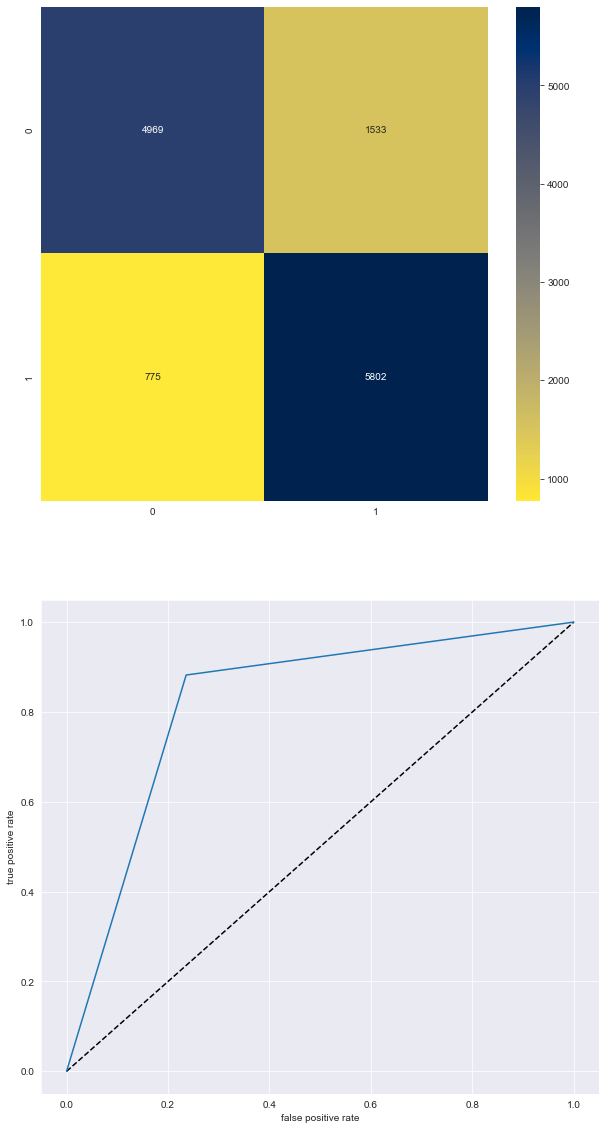

****** Decision Tree classifier  ******

 ROC_AUC_SCORE :  0.851634170456996
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6502
           1       0.85      0.86      0.85      6577

    accuracy                           0.85     13079
   macro avg       0.85      0.85      0.85     13079
weighted avg       0.85      0.85      0.85     13079

Precision:  0.848699052489096
Recall:  0.8579899650296487
F1 score:  0.8533192197187358
AxesSubplot(0.125,0.536818;0.62x0.343182)


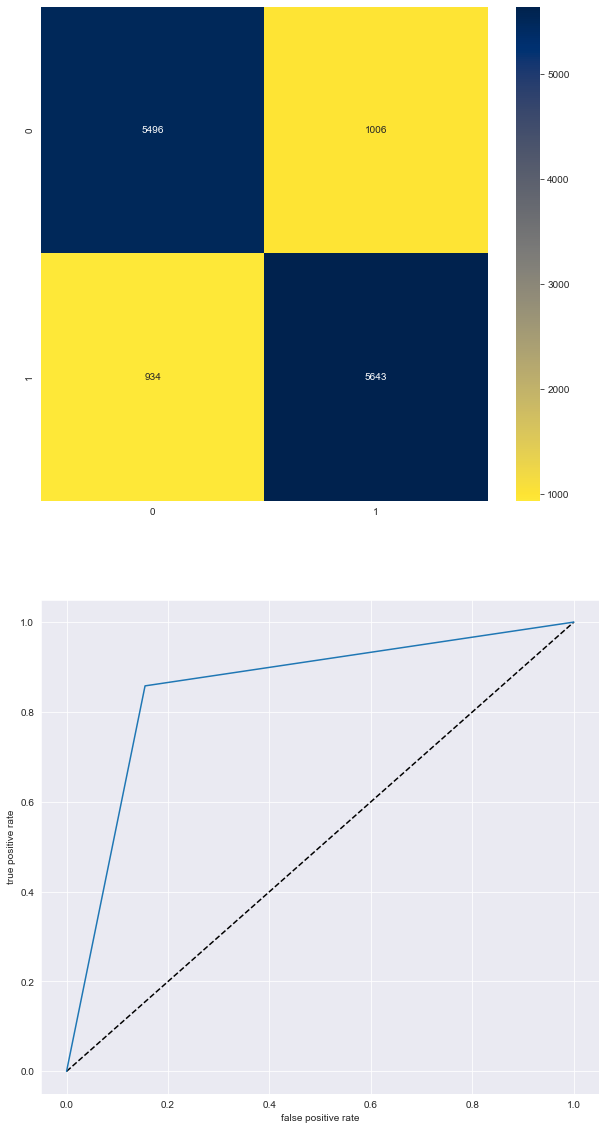

****** Random forest classifier  ******

 ROC_AUC_SCORE :  0.9026524838125387
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6502
           1       0.90      0.91      0.90      6577

    accuracy                           0.90     13079
   macro avg       0.90      0.90      0.90     13079
weighted avg       0.90      0.90      0.90     13079

Precision:  0.9014532243415078
Recall:  0.9054280066899802
F1 score:  0.9034362436471213
AxesSubplot(0.125,0.536818;0.62x0.343182)


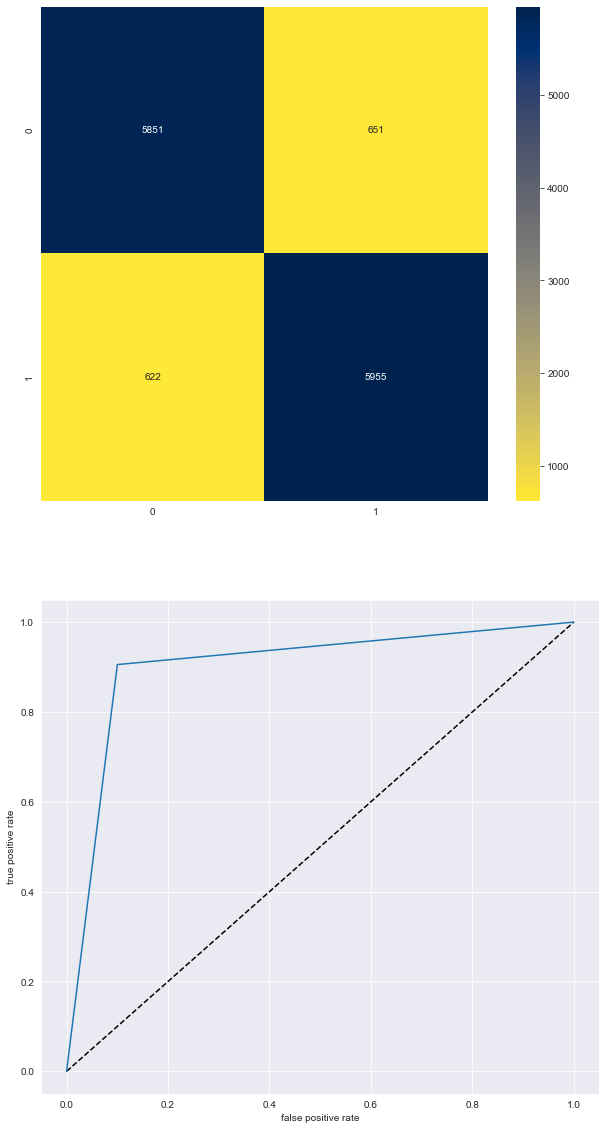

****** AdaBoost classifier ******

 ROC_AUC_SCORE :  0.8522385739067105
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6502
           1       0.84      0.87      0.86      6577

    accuracy                           0.85     13079
   macro avg       0.85      0.85      0.85     13079
weighted avg       0.85      0.85      0.85     13079

Precision:  0.8396198830409357
Recall:  0.8731944655618062
F1 score:  0.8560781098606245
AxesSubplot(0.125,0.536818;0.62x0.343182)


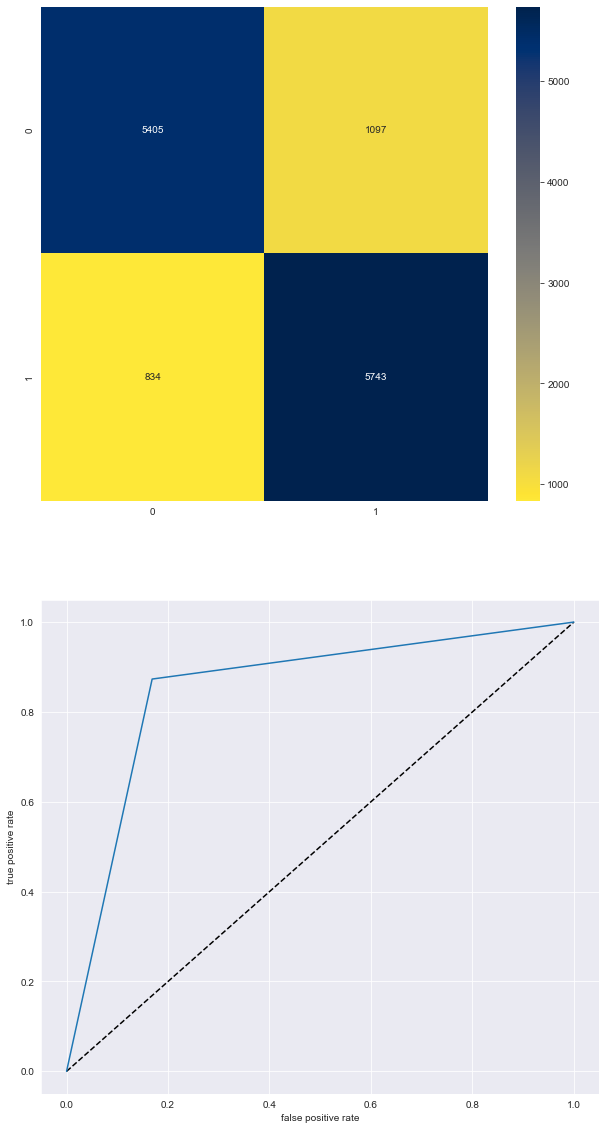

****** Gradient Boosting classifier  ******

 ROC_AUC_SCORE :  0.8714997202998602
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      6502
           1       0.86      0.89      0.88      6577

    accuracy                           0.87     13079
   macro avg       0.87      0.87      0.87     13079
weighted avg       0.87      0.87      0.87     13079

Precision:  0.8572053675612602
Recall:  0.8935684962748973
F1 score:  0.8750093054418224
AxesSubplot(0.125,0.536818;0.62x0.343182)


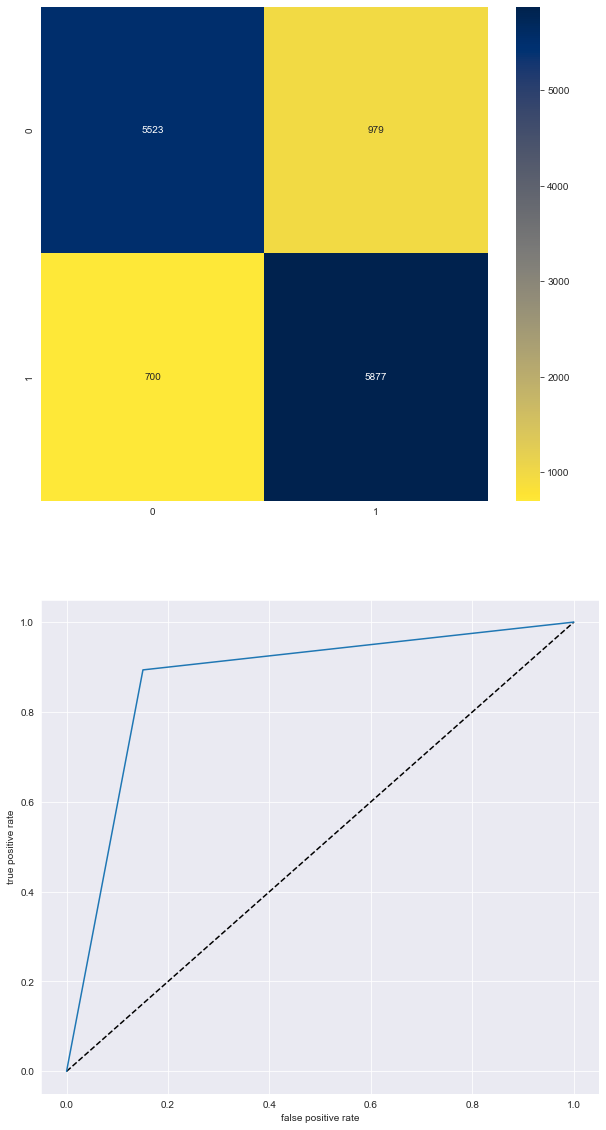

****** Naive Bayes classifier ******

 ROC_AUC_SCORE :  0.7117037987446068
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      6502
           1       0.73      0.67      0.70      6577

    accuracy                           0.71     13079
   macro avg       0.71      0.71      0.71     13079
weighted avg       0.71      0.71      0.71     13079

Precision:  0.7348751466398525
Recall:  0.6667173483351072
F1 score:  0.699139030612245
AxesSubplot(0.125,0.536818;0.62x0.343182)


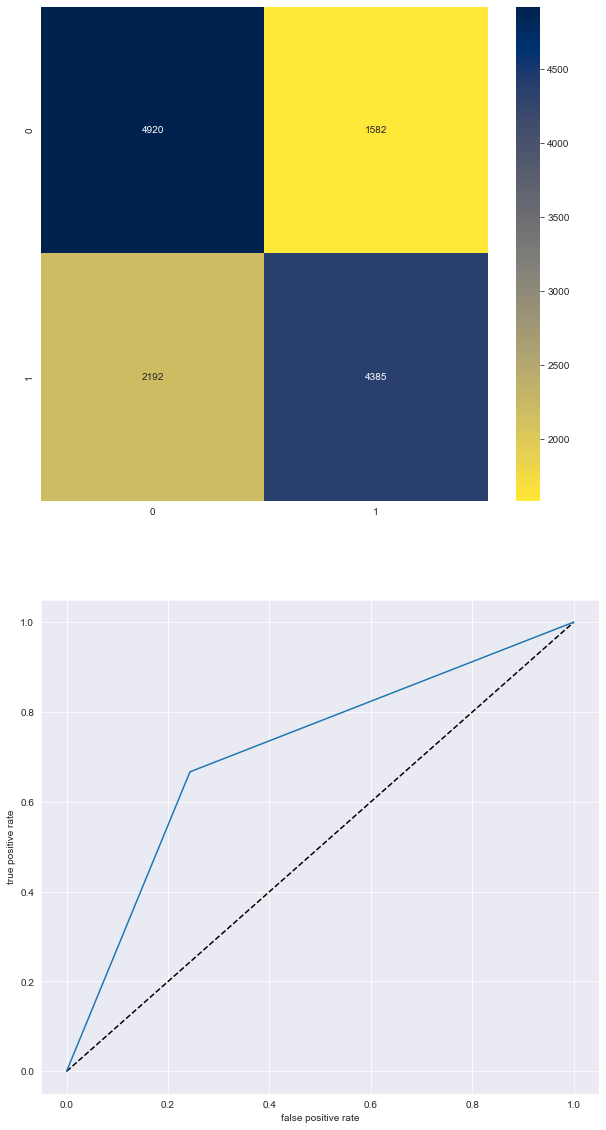

In [66]:
# checking different metrics for evaluation
precision_ =[]
recall_ = []
f1score = []
rocauc = []
for name,model in models:
    print("******",name,"******")
    
    fpr,tpr,thresholds=roc_curve(ytest,model.predict(xtest))
    roc_auc= auc(fpr,tpr)
    print("\n","ROC_AUC_SCORE : ",roc_auc)
    rocauc.append(roc_auc)
    print(classification_report(ytest,model.predict(xtest)))
    precision = precision_score(ytest, model.predict(xtest))
    print('Precision: ', precision)
    precision_.append(precision)
    recall = recall_score(ytest, model.predict(xtest))
    print('Recall: ', recall)
    recall_.append(recall)
    f1 = f1_score(ytest, model.predict(xtest))
    print('F1 score: ', f1)
    f1score.append(f1)
    plt.figure(figsize=(10,20))
    plt.subplot(211)
    cm = confusion_matrix(ytest,model.predict(xtest))
    print(sns.heatmap(cm,annot=True,fmt='d',cmap='cividis_r'))
    plt.subplot(212)
    plt.plot([0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

In [67]:
# checking cross validation score
crossval=[]
for name,model in models:
    print("******",name,"******")
    cv_= cross_val_score(model,x,y,cv=5).mean()
    print(cv_)
    crossval.append(cv_)

****** Logistic Regression  ******
0.813116592456252
****** K Nearest Neighbor classifier  ******
0.8626188713128602
****** Support Vector classifier  ******
0.823485032845104
****** Decision Tree classifier  ******
0.8568848712553432
****** Random forest classifier  ******
0.9023726625508559
****** AdaBoost classifier ******
0.8519294826220231
****** Gradient Boosting classifier  ******
0.8678033519916436
****** Naive Bayes classifier ******
0.7210624783307931


In [68]:
# creating a data frame for evaluation
evaluate = pd.DataFrame({})
evaluate['Model'] = Model
evaluate['Train score'] = train_scores
evaluate['Test score'] = test_scores
evaluate['Precision'] = precision_
evaluate['Recall'] = recall_
evaluate['F1 score'] = f1score
evaluate['Roc-Auc score'] = rocauc
evaluate['Cross val score'] = crossval

evaluate

,Model,Train score,Test score,Precision,Recall,F1 score,Roc-Auc score,Cross val score
0,Logistic Regression,0.813076,0.812142,0.801258,0.833055,0.816847,0.812021,0.813117
1,K Nearest Neighbor classifier,0.899394,0.852970,0.806588,0.930820,0.864262,0.852521,0.862619
2,Support Vector classifier,0.825430,0.823534,0.791002,0.882165,0.834100,0.823196,0.823485
3,Decision Tree classifier,1.000000,0.851671,0.848699,0.857990,0.853319,0.851634,0.856885
4,Random forest classifier,1.000000,0.902668,0.901453,0.905428,0.903436,0.902652,0.902373
5,AdaBoost classifier,0.854825,0.852359,0.839620,0.873194,0.856078,0.852239,0.851929
6,Gradient Boosting classifier,0.878388,0.871626,0.857205,0.893568,0.875009,0.871500,0.867803
7,Naive Bayes classifier,0.720728,0.711446,0.734875,0.666717,0.699139,0.711704,0.721062


From the above Dataframe we can choose Random forest as the best model because it is performing the best among all other models with a test score of 0.902 and Highest cross val score of .901 also the precision, recall, roc-auc score, F1 score are pretty good all with approx 0.9 score each. Will be Tuning the Random forest classifier further for better model

### Hyperparameter tuning

In [93]:
from sklearn.model_selection import RandomizedSearchCV
# selecting parametr grid to tune model
params = {'n_estimators':np.arange(50,200,50),
          'criterion':['gini','entropy'],
          'max_depth': np.arange(2,14,4),
          'max_features':['auto', 'sqrt', 'log2'],
          'class_weight':['balanced', 'balanced_subsample'],
          'min_samples_split':np.arange(2,30,2)
         }
random_search=GridSearchCV(RTF,params,n_jobs=-1,cv=5,verbose=5)
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  6, 10]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'n_estimators': array([ 50, 100, 150])},
             verbose=5)

In [94]:
# best parameters after grid search
random_search.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 100}

Accuracy Score 0.867879807324719
Cross val score 0.8647753976260825


<AxesSubplot:>

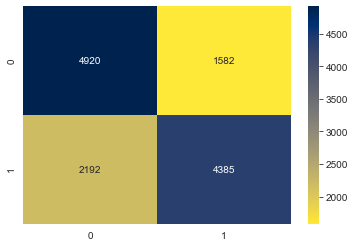

In [97]:
## tuning model
tuned_mod = RandomForestClassifier(n_estimators=100,max_depth=10,criterion='gini',
                                   max_features='sqrt',min_samples_split=4,
                                   class_weight='balanced_subsample')
tuned_mod.fit(xtrain,ytrain)
tuned_pred = tuned_mod.predict(xtest)
print("Accuracy Score",accuracy_score(ytest,tuned_pred))
cross_val = cross_val_score(tuned_mod,x,y,scoring='accuracy',cv=5).mean()
print("Cross val score",cross_val)
cm = confusion_matrix(ytest,model.predict(xtest))
sns.heatmap(cm,annot=True,fmt='d',cmap='cividis_r')

In [96]:
print(classification_report(ytest, tuned_mod.predict(xtest)))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      6502
           1       0.84      0.91      0.87      6577

    accuracy                           0.87     13079
   macro avg       0.87      0.87      0.87     13079
weighted avg       0.87      0.87      0.87     13079



Will be saving the default Random Forest model as it gives the best result than the tuned model

### Saving the model

In [98]:
import joblib
joblib.dump(RTF,'Census_Income.pkl')

['Census_Income.pkl']